# Processing the data compiled from the API

In this notebook, we process the data obtained from the API, resulting in a dataframe that can be used for further analysis.

The compiled data is stored in the `data/compiled` folder.

The processed data is then stored in the `data/processed` folder.

The module `data_processing` contains the functions used to process the data.

In [3]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from nlp_assemblee.data_processing import DataProcessing

sns.set_style("ticks")
sns.set_context("paper")
sns.set_palette("muted")


filterwarnings("ignore")

In [4]:
# label_dict_15th = {
#     "NI": 2,
#     "UAI": 2,
#     "LC": 2,
#     "LR": 2,
#     "LFI": 0,
#     "NG": 0,
#     "GDR": 0,
#     "LREM": 1,
#     "MODEM": 1,
# }

# processor15 = DataProcessing(
#     deputies_df_path="../../data/compiled/15th_deputies.pkl",
#     compiled_data_path="../../data/compiled/15th_legislature_complete.tsv",
#     # process=False,
#     # save=False
#     process=True,
#     max_len=512,
#     save="../../data/processed",
#     legislature=15,
# )

We focus on the data from the 14th legislature, which is stored in the `data/compiled/` folder.

To process it, we use the DataProcessing class from the `data_processing` module.
It loads the data from the `data/compiled/` folder and processes it.

It processes :

* The deputies' data
* The compiled speech data
* Then it merges the two dataframes
* Then it tokenizes the interventions, the titles and the professions
* The data is then stored in the `data/processed/` folder
* The file of interest being `data/processed/14th_records.pkl`, which contains the processed and the tokenized data (both with BERT and CamemBERT).
* The tokenizing takes around 10 minutes, so it is recommended to load the preprocessed data.

In [5]:
label_dict_14th = {
    "SRC": 0,
    "ECOLO": 0,
    "SER": 0,
    "GDR": 0,
    "UDI": 1,
    "RRDP": 1,
    "LR": 2,
    "UMP": 2,
    "RUMP": 2,
    "NI": 2,
    "": 2,
}

processor14 = DataProcessing(
    deputies_df_path="../data/compiled/14th_deputies.pkl",
    compiled_data_path="../data/compiled/14th_legislature_complete.tsv",
    label_dict=label_dict_14th,
    # process=True,
    # tokenize=True,
    # save="../data/processed",
    # load=False,
    process=False,
    tokenize=False,
    save=False,
    load="../data/processed",
    max_len=512,
    year_min=1940,
    year_max=2022,
    legislature=14,
)

Loading the processed data...
Loading the dataframes...
Loading the records...
Loading the tokenizers...


## Exploring the deputies dataframe

First, we look at the processed deputies dataframe. It contains informations about the deputies.

It has the following columns:

In [6]:
processor14.deputies_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    648 non-null    int64 
 1   nom                   648 non-null    object
 2   nom_de_famille        648 non-null    object
 3   prenom                648 non-null    object
 4   sexe                  648 non-null    object
 5   date_naissance        648 non-null    object
 6   lieu_naissance        645 non-null    object
 7   num_deptmt            648 non-null    object
 8   nom_circo             648 non-null    object
 9   num_circo             648 non-null    int64 
 10  mandat_debut          648 non-null    object
 11  mandat_fin            648 non-null    object
 12  ancien_depute         648 non-null    int64 
 13  groupe_sigle          648 non-null    object
 14  parti_ratt_financier  648 non-null    object
 15  anciens_mandats       648 non-null    ob

In [7]:
processor14.deputies_df_processed.head()

,id,nom,nom_de_famille,prenom,sexe,date_naissance,lieu_naissance,num_deptmt,nom_circo,num_circo,...,mandat_fin,ancien_depute,groupe_sigle,parti_ratt_financier,anciens_mandats,profession,place_en_hemicycle,slug,nb_mandats,legislature
0,1,Jean-François Lamour,Lamour,Jean-François,H,1956-02-02,Paris (Paris),75,Paris,13,...,2017-06-20,1,LR,Les Républicains,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Kinésithérapeute,80,jean-francois-lamour,2,2012-2017
1,2,Jean-Michel Clément,Clément,Jean-Michel,H,1954-10-31,Mauprevoir (Vienne),86,Vienne,3,...,2017-06-20,1,SER,Parti socialiste,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Avocat,263,jean-michel-clement,2,2012-2017
2,3,Bernard Reynès,Reynès,Bernard,H,1953-10-18,Meknès (Maroc),13,Bouches-du-Rhône,15,...,2017-06-20,1,LR,Les Républicains,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Chirurgien-Dentiste,190,bernard-reynes,2,2012-2017
3,4,Sandrine Hurel,Hurel,Sandrine,F,1968-08-07,Lisieux (Calvados),76,Seine-Maritime,6,...,2015-08-27,1,,Parti socialiste,[{'mandat': '20/06/2007 / 19/06/2012 / fin de ...,Secrétaire de direction,460,sandrine-hurel,2,2012-2017
4,5,Marc Laffineur,Laffineur,Marc,H,1945-08-10,Maubeuge (Nord),49,Maine-et-Loire,7,...,2017-06-20,1,LR,Les Républicains,"[{'mandat': '20/06/2012 / / '}, {'mandat': '0...",Médecin anesthésiste-réanimateur,183,marc-laffineur,2,2012-2017


We can then look at some descriptive statistics :

In [8]:
ddf = processor14.deputies_df_processed.copy()
ddf["date_naissance"] = pd.to_datetime(ddf["date_naissance"])

ddf["Groupe"] = (
    ddf["groupe_sigle"].map(label_dict_14th).map({0.0: "Gauche", 1.0: "Centre", 2.0: "Droite"})
)
ddf["Partie"] = ddf["groupe_sigle"].map(lambda x: "NI" if x == "" else x)

In [9]:
fig = px.sunburst(
    ddf,
    path=["Groupe", "Partie"],
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Répartition des groupes politiques dans la 14ème législature",
)
fig.show()
fig.write_image("../images/sunburst_groupes.png")

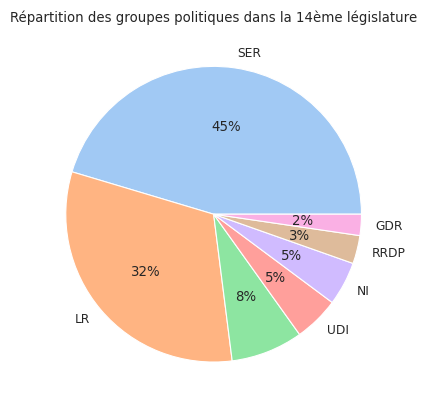

In [10]:
colors = sns.color_palette("pastel", as_cmap=True)
ax = ddf["groupe_sigle"].value_counts().plot.pie(colors=colors, autopct="%0.0f%%")
ax.set(ylabel="", title="Répartition des groupes politiques dans la 14ème législature")
fig.write_image("../images/pie_groupes.png")

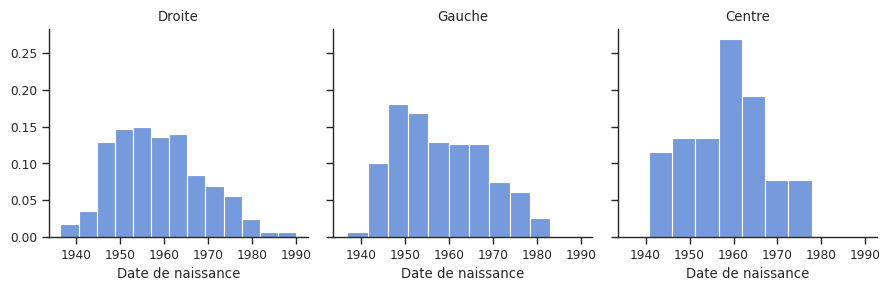

In [11]:
title = "Répartition des ages selon le groupe politique dans la 14ème législature"

g = sns.FacetGrid(ddf, col="Groupe", margin_titles=True)
g.map(sns.histplot, "date_naissance", stat="probability")
g.set_axis_labels("Date de naissance", "")
# g.figure.suptitle(title, fontsize=16)
for group in g.axes_dict:
    subtitle = group if group != "" else "Pas de groupe"
    g.axes_dict[group].set_title(subtitle)
g.figure.tight_layout()
g.figure.savefig("../images/histplot_groupes.png")

In [12]:
sexe_df = ddf.groupby("Groupe")["sexe"].value_counts(normalize=True, sort=True) * 100
sexe_df.name = "percentage"
sexe_df = sexe_df.reset_index()

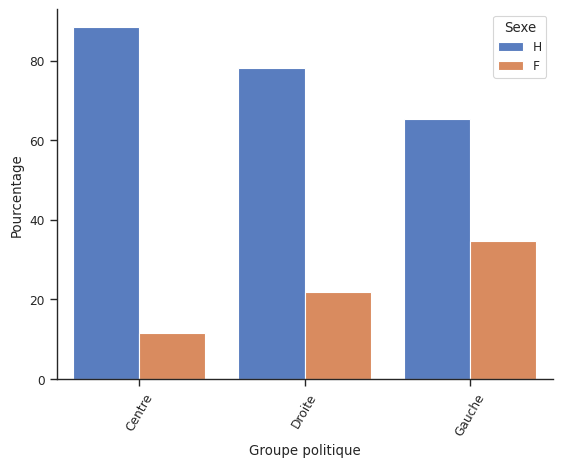

In [13]:
g = sns.barplot(data=sexe_df, y="percentage", x="Groupe", hue="sexe")
sns.despine()
plt.xticks(rotation=60)
g.set(xlabel="Groupe politique", ylabel="Pourcentage")
g.legend(title="Sexe")
g.figure.savefig("../images/barplot_sexe.png")

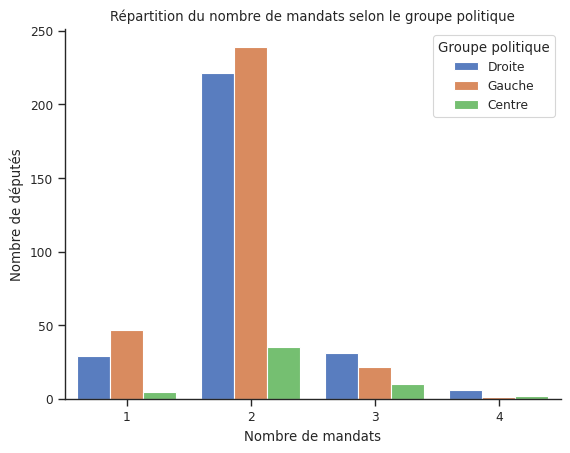

In [14]:
g = sns.countplot(data=ddf, x="nb_mandats", hue="Groupe")
sns.despine()
g.set(
    xlabel="Nombre de mandats",
    ylabel="Nombre de députés",
    title="Répartition du nombre de mandats selon le groupe politique",
)
g.legend(title="Groupe politique")
g.figure.savefig("../images/countplot_mandats.png")

## Exploring the processed compiled dataframe

Then, we can look at one of the resulting dataframe. We will not explore it more as it is not used as is in the analysis, but it is a intermediate step.

In [30]:
processor14.compiled_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363572 entries, 0 to 363571
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  363572 non-null  int64 
 1   seance_id           363572 non-null  int64 
 2   date                363572 non-null  object
 3   moment              363572 non-null  object
 4   type                363572 non-null  object
 5   titre_complet       363572 non-null  object
 6   titre               363572 non-null  object
 7   timestamp           363572 non-null  int64 
 8   intervention        363572 non-null  object
 9   nb_mots             363572 non-null  int64 
 10  personnalite        0 non-null       object
 11  depute              363572 non-null  object
 12  parlementaire_sexe  363572 non-null  object
 13  depute_groupe       363572 non-null  object
 14  fonction            72597 non-null   object
 15  source              363572 non-null  object
 16  in

In [16]:
processor14.compiled_data_processed.head()

,id,seance_id,date,moment,type,titre_complet,titre,timestamp,intervention,nb_mots,personnalite,depute,parlementaire_sexe,depute_groupe,fonction,source,intervention_count,nb_mots_approx
0,125,11,2012-07-03,15:00,loi,déclaration de politique générale du gouvernem...,déclaration de politique générale du gouvernem...,190,"Alors, arrêtez de dépenser !",8,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,5
1,531,22,2012-07-04,15:00,loi,rappels au règlement,rappels au règlement,160,Commencez par respecter l'opposition ! (Protes...,16,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,16
2,568,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,530,Apprenez à respecter le Parlement ! Où vous cr...,9,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,10
3,827,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,3120,"Madame la présidente, monsieur le ministre, me...",186,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,181
4,829,22,2012-07-04,15:00,loi,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,3140,"Bien sûr, les impôts vont à nouveau pleuvoir c...",64,NaN,Pierre Lellouche,H,UMP,NaN,http://www.assemblee-nationale.fr/14/cri/2011-...,1562,58


## Exploring the merged dataframes

Here, we look at the merged dataframes. Those are the dataframes that will be used for the analysis.

The first one contains larger interventions, since it is the result of grouping the interventions by deputies, session and theme.

The second contains smaller interventions as they are kept as is.

In [17]:
processor14.short_interventions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363572 entries, 0 to 363571
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   nom                 363572 non-null  object        
 1   groupe              363572 non-null  object        
 2   seance_id           363572 non-null  int64         
 3   date_seance         363572 non-null  object        
 4   titre               363572 non-null  object        
 5   titre_complet       363572 non-null  object        
 6   intervention        363572 non-null  object        
 7   nb_mots             363572 non-null  int64         
 8   intervention_count  363572 non-null  int64         
 9   nb_mots_approx      363572 non-null  int64         
 10  date_naissance      363572 non-null  object        
 11  sexe                363572 non-null  object        
 12  profession          363572 non-null  object        
 13  nb_mandats          363572 no

In [18]:
processor14.short_interventions.head()

,nom,groupe,seance_id,date_seance,titre,titre_complet,intervention,nb_mots,intervention_count,nb_mots_approx,...,day,y_naissance,n_y_naissance,n_year,cos_month,sin_month,cos_day,sin_day,n_sexe,label
0,Pierre Lellouche,UMP,11,2012-07-03,déclaration de politique générale du gouvernem...,déclaration de politique générale du gouvernem...,"Alors, arrêtez de dépenser !",8,1562,5,...,3,1951,0.865854,0.0,-0.866025,-0.5,0.820763,0.571268,0,2
1,Pierre Lellouche,UMP,22,2012-07-04,rappels au règlement,rappels au règlement,Commencez par respecter l'opposition ! (Protes...,16,1562,16,...,4,1951,0.865854,0.0,-0.866025,-0.5,0.688967,0.724793,0,2
2,Pierre Lellouche,UMP,22,2012-07-04,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,Apprenez à respecter le Parlement ! Où vous cr...,9,1562,10,...,4,1951,0.865854,0.0,-0.866025,-0.5,0.688967,0.724793,0,2
3,Pierre Lellouche,UMP,22,2012-07-04,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,"Madame la présidente, monsieur le ministre, me...",186,1562,181,...,4,1951,0.865854,0.0,-0.866025,-0.5,0.688967,0.724793,0,2
4,Pierre Lellouche,UMP,22,2012-07-04,débat sur les résultats du conseil européen de...,débat sur les résultats du conseil européen de...,"Bien sûr, les impôts vont à nouveau pleuvoir c...",64,1562,58,...,4,1951,0.865854,0.0,-0.866025,-0.5,0.688967,0.724793,0,2


In [21]:
cdf = processor14.short_interventions.copy()
cdf["Groupe"] = (
    cdf["groupe"].map(label_dict_14th).map({0.0: "Gauche", 1.0: "Centre", 2.0: "Droite"})
)
cdf["Partie"] = cdf["groupe"]

In [22]:
fig = px.sunburst(
    cdf,
    path=["Groupe", "Partie"],
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Répartition des groupes politiques dans la 14ème législature",
)
fig.show()
fig.write_image("../images/sunburst_groupes_interventions.png")

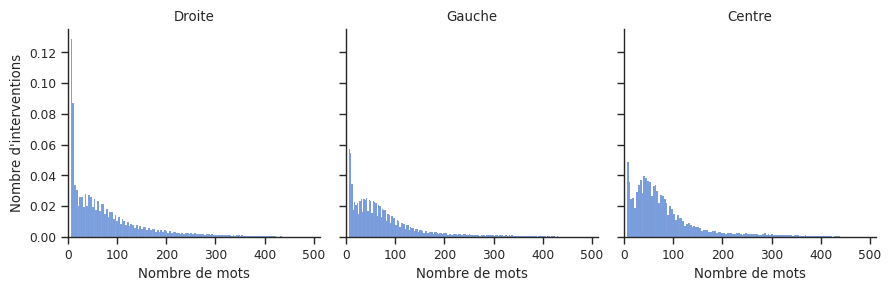

In [23]:
title = "Répartition du nombre de mots dans les interventions"

g = sns.FacetGrid(cdf, col="Groupe", margin_titles=True)
g.map(sns.histplot, "nb_mots_approx", stat="probability")

g.set_axis_labels("Nombre de mots", "Nombre d'interventions")
# g.figure.suptitle(title, fontsize=16)
for group in g.axes_dict:
    g.axes_dict[group].set_title(group)
    g.axes_dict[group].set_xlim(0, 512)
g.figure.tight_layout()
g.figure.savefig("../images/histplot_nb_mots.png")

We notice that the distribution of the number of words in the interventions are similar for all groups. Most interventions are around 50 words long.

However, we do notice that the major parties have more really shorts interventions than the minor parties.

## Looking at the tokenised data

Lastly, we look at the "records", that contain all the previous informations, but also the tokenised interventions, titles and profession, using both Camembert and BERT.

In [24]:
example = processor14.records[500]

In [25]:
example

{'nom': 'Pierre Lellouche',
 'groupe': 'UMP',
 'seance_id': 3633,
 'date_seance': '2014-09-15',
 'titre': 'discussion générale',
 'titre_complet': 'lutte contre le terrorisme > discussion générale',
 'intervention': "Nous aurons, lors de la discussion des articles, l'occasion de revenir en détail sur les mesures que vous proposez, monsieur le ministre. Je le dis d'emblée, j'approuve celles qui touchent au contrôle de la propagande mortifère sur internet, de même que les dispositifs prévoyant une meilleure coordination interministérielle dans la lutte contre le terrorisme. Dans le même ordre d'idées, nous soutiendrons l'évolution de notre loi afin de criminaliser les actes commis par les fameux loups solitaires.",
 'nb_mots': 1262,
 'intervention_count': 1562,
 'nb_mots_approx': 76,
 'date_naissance': '1951-05-03',
 'sexe': 'H',
 'profession': 'Avocat et universitaire',
 'nb_mandats': 2,
 'date': Timestamp('2014-09-15 00:00:00'),
 'year': 2014,
 'month': 9,
 'day': 15,
 'y_naissance': 1

In [26]:
example["intervention"]

"Nous aurons, lors de la discussion des articles, l'occasion de revenir en détail sur les mesures que vous proposez, monsieur le ministre. Je le dis d'emblée, j'approuve celles qui touchent au contrôle de la propagande mortifère sur internet, de même que les dispositifs prévoyant une meilleure coordination interministérielle dans la lutte contre le terrorisme. Dans le même ordre d'idées, nous soutiendrons l'évolution de notre loi afin de criminaliser les actes commis par les fameux loups solitaires."

In [27]:
example["camembert_tokens"]["intervention"]

[5,
 170,
 12639,
 7,
 298,
 8,
 13,
 3651,
 20,
 1213,
 7,
 17,
 11,
 690,
 8,
 1910,
 22,
 2636,
 32,
 19,
 1546,
 27,
 39,
 441,
 138,
 7,
 5615,
 16,
 938,
 9,
 100,
 16,
 701,
 18,
 11,
 15659,
 7,
 76,
 11,
 17472,
 10367,
 989,
 31,
 14971,
 36,
 963,
 8,
 13,
 11647,
 626,
 10592,
 32,
 890,
 7,
 8,
 93,
 27,
 19,
 5945,
 26432,
 28,
 1058,
 8137,
 1361,
 12527,
 10,
 3664,
 144,
 29,
 13,
 1671,
 192,
 16,
 8429,
 9,
 211,
 16,
 93,
 2981,
 18,
 11,
 6264,
 7,
 63,
 1237,
 20211,
 10,
 17,
 11,
 2010,
 8,
 127,
 589,
 289,
 8,
 60,
 31123,
 1864,
 19,
 3109,
 6325,
 37,
 19,
 3869,
 14979,
 9463,
 10,
 9,
 6]

In [28]:
processor14.camembert_tokenizer.decode(example["camembert_tokens"]["intervention"])

"Nous aurons, lors de la discussion des articles, l'occasion de revenir en détail sur les mesures que vous proposez, monsieur le ministre. Je le dis d'emblée, j'approuve celles qui touchent au contrôle de la propagande mortifère sur internet, de même que les dispositifs prévoyant une meilleure coordination interministérielle dans la lutte contre le terrorisme. Dans le même ordre d'idées, nous soutiendrons l'évolution de notre loi afin de criminaliser les actes commis par les fameux loups solitaires."

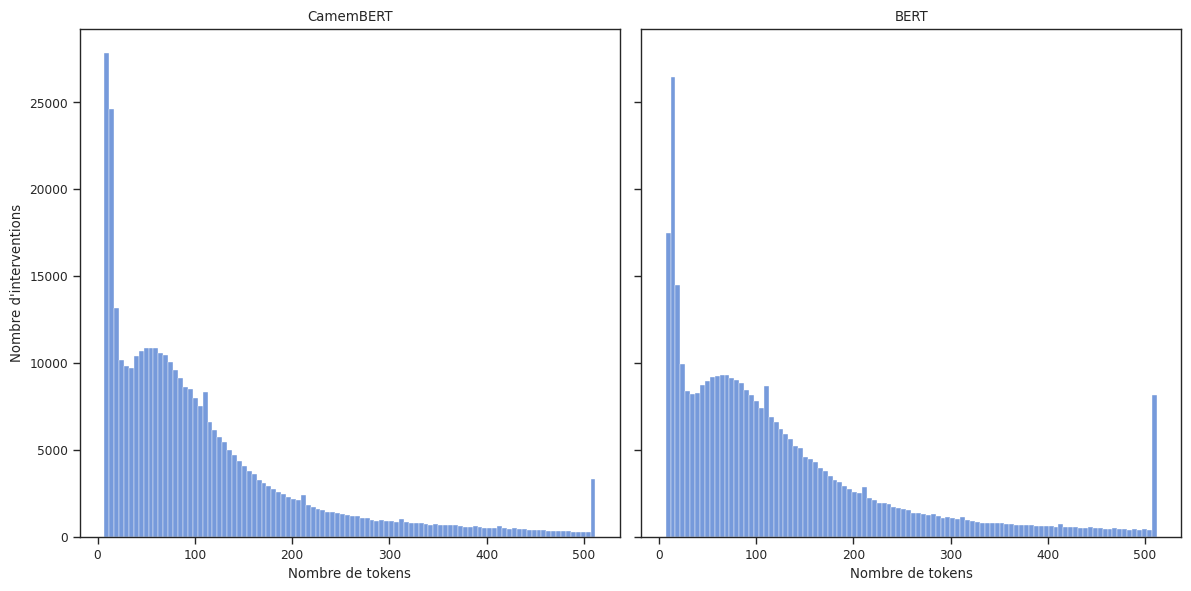

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

c_lens = []
for record in processor14.records:
    c_lens.append(len(record["camembert_tokens"]["intervention"]))
sns.histplot(c_lens, bins=100, ax=ax1)
ax1.set(xlabel="Nombre de tokens", ylabel="Nombre d'interventions", title="CamemBERT")

b_lens = []
for record in processor14.records:
    b_lens.append(len(record["bert_tokens"]["intervention"]))
sns.histplot(b_lens, bins=100, ax=ax2)
ax2.set(xlabel="Nombre de tokens", ylabel="Nombre d'interventions", title="BERT")


# fig.suptitle("Répartition du nombre de tokens dans les interventions")
fig.tight_layout()
fig.savefig("../images/histplot_nb_tokens.png")